In [115]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import math
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sns.set(color_codes=True)
warnings.filterwarnings("ignore")

In [173]:
df=pd.read_csv('reviews.csv')

In [174]:
df.head()

,location_id,review_id,source,date,rating
0,4962_221,test_1895327047,GOOGLE_PLACES,10/20/15,1.0
1,4962_221,test_18961550118,FACEBOOK,11/27/17,1.0
2,4962_221,test_2044312531,FACEBOOK,11/15/17,1.0
3,4962_221,test_21399832280,FACEBOOK,7/17/17,1.0
4,4962_221,test_21516225526,FACEBOOK,1/11/16,1.0


In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179345 entries, 0 to 179344
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   location_id  179345 non-null  object 
 1   review_id    179345 non-null  object 
 2   source       179345 non-null  object 
 3   date         179345 non-null  object 
 4   rating       179276 non-null  float64
dtypes: float64(1), object(4)
memory usage: 6.8+ MB


In [176]:
df.dropna(inplace=True)

In [178]:
df.date=pd.to_datetime(df.date)

In [31]:
df[df.location_id=='4962_201'].rating.mean()

4.750539956803456

In [32]:
df[df.location_id=='4962_380'].rating.mean()

4.669796557120501

## a
* I think the location '4962_201' is better, because it has higher mean rating.

In [33]:
df[df.location_id=='4962_381'].rating.mean()

4.554561717352415

In [34]:
df[df.location_id=='4962_915'].rating.mean()

4.629558541266794

## b
* I think the location '4962_915' is better, because it has higher mean rating.

In [35]:
df.rating.unique()

array([1., 2., 3., 4., 5.])

In [36]:
df.location_id.value_counts()

4962_768    1630
4962_727     997
4962_465     992
4962_402     992
4962_457     989
            ... 
4962_557     500
4962_289     181
4962_221     120
4962_147      62
4962_185      12
Name: location_id, Length: 252, dtype: int64

In [37]:
df.date.value_counts()

2018-01-31    428
2018-02-07    423
2017-06-29    416
2018-02-06    411
2018-01-30    407
             ... 
2015-10-11     25
2014-05-18     22
2014-05-11     22
2014-10-26     19
2015-03-15     16
Name: date, Length: 1550, dtype: int64

In [38]:
max(df.date),min(df.date)

(Timestamp('2018-03-30 00:00:00'), Timestamp('2014-01-01 00:00:00'))

In [39]:
df.groupby('source').mean()

,rating
source,
CARS,4.781000
FACEBOOK,4.178708
GOOGLE_PLACES,4.326817


In [40]:
df.groupby('source').count()

,location_id,review_id,date,rating
source,,,,
CARS,43041,43041,43041,43041
FACEBOOK,26507,26507,26507,26507
GOOGLE_PLACES,109728,109728,109728,109728


In [41]:
df.groupby('location_id').mean()

,rating
location_id,
4962_10,4.410653
4962_1000,4.462575
4962_1005,4.369085
4962_101,4.104953
4962_103,4.279449
...,...
4962_985,4.503077
4962_987,4.645022
4962_988,4.588621


In [42]:
df.groupby(['location_id','source']).mean()

rating
location_id source                 
4962_10     CARS           4.616279
            FACEBOOK       4.357143
            GOOGLE_PLACES  4.385350
4962_1000   CARS           4.875817
            FACEBOOK       4.080000
...                             ...
4962_990    FACEBOOK       4.456000
            GOOGLE_PLACES  4.334884
4962_993    CARS           4.693182
            FACEBOOK       4.220183
            GOOGLE_PLACES  4.379032

[695 rows x 1 columns]

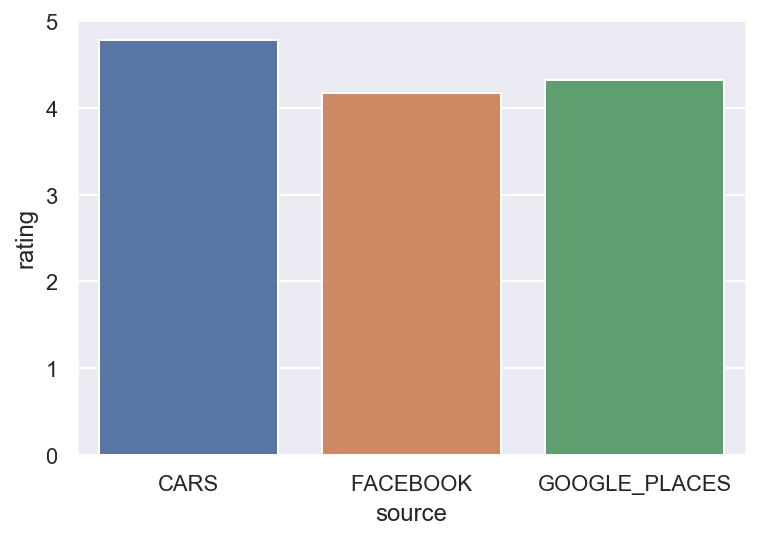

In [43]:
source=df.groupby('source').mean()
sns.barplot(source.index,source.rating)

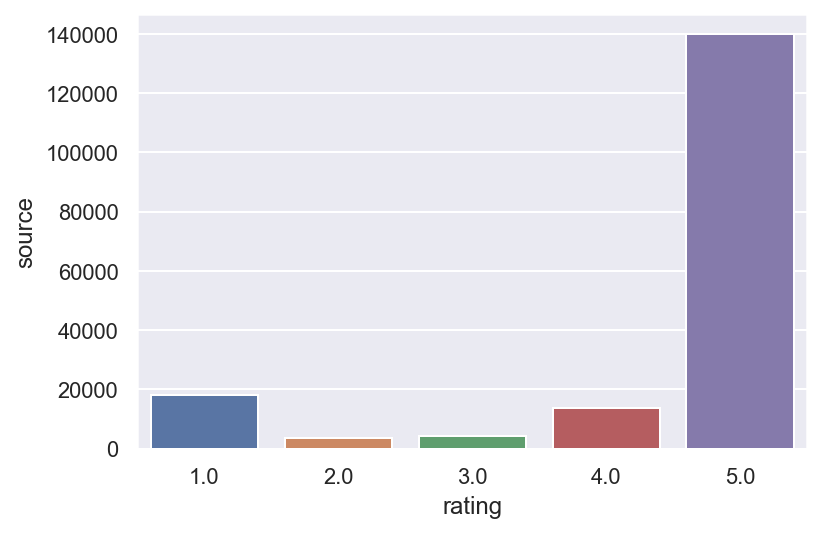

In [44]:
rating=df.groupby('rating').count()
sns.barplot(rating.index,rating.source)

In [45]:
df.groupby(['location_id','rating']).count()

review_id  source  date
location_id rating                         
4962_10     1.0            64      64    64
            2.0             8       8     8
            3.0            17      17    17
            4.0            29      29    29
            5.0           464     464   464
...                       ...     ...   ...
4962_993    1.0            48      48    48
            2.0             9       9     9
            3.0            26      26    26
            4.0            72      72    72
            5.0           414     414   414

[1255 rows x 3 columns]

## c
Since there is no obvious trend for the rating, I descide to use the good rating rate to estimate the rank of the locations. Here, I define ratings above 4 as good rating and I calculate its rate in the location. Because from the above plots we can see that most of the rating is 5, I conclude that if people it is a good location, they will give a 5 score rating. 

In [46]:
def rate(nums):
    l=len(nums)
    r4=sum(nums==4)/l
    r5=sum(nums==5)/l
    return r4+r5 

* Above is the formula

In [47]:
d={}
for l in df.location_id.unique():
    d[l]=rate(df[df.location_id==l].rating)
dm=pd.DataFrame.from_dict(d,orient='index', columns=['rating']).reset_index()

* Here is the ranking result

In [48]:
dm['rank']=dm.rating.rank(ascending=False)
dm.rename(columns={'index':'location_id'},inplace=True)
dm.sort_values(by='rating', ascending=False)

,location_id,rating,rank
151,4962_597,0.993557,1.0
248,4962_131,0.982143,2.0
243,4962_435,0.981339,3.0
207,4962_343,0.969432,4.0
241,4962_917,0.964335,5.0
...,...,...,...
89,4962_267,0.701342,248.0
110,4962_733,0.690377,249.0
17,4962_935,0.633628,250.0
5,4962_934,0.593199,251.0


## d
In this case, I would include the reviewers' comment data. I can do some NLP process. Then, I can make conclusion with the result of comment analysis and the rating. I think this would be more accurate to determine the rank of locations across the US.

In [198]:
dt=pd.read_csv('test_reviews.csv')

In [50]:
dt.head()

,location_id,review_id,source,date,rating
0,4962_147,test_10368849285,FACEBOOK,12/4/15,NaN
1,4962_147,test_1042394214,FACEBOOK,11/29/16,NaN
2,4962_185,test_11322162891,GOOGLE_PLACES,8/3/16,NaN
3,4962_185,test_11324660949,GOOGLE_PLACES,2/3/18,NaN
4,4962_185,test_11348252095,GOOGLE_PLACES,2/12/16,NaN


In [58]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1124 entries, 0 to 1386
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   location_id  1124 non-null   object 
 1   review_id    1124 non-null   object 
 2   source       1124 non-null   object 
 3   date         1124 non-null   object 
 4   rating       0 non-null      float64
dtypes: float64(1), object(4)
memory usage: 52.7+ KB


In [199]:
dt=dt[dt.location_id.notnull()]

In [59]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1124 entries, 0 to 1386
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   location_id  1124 non-null   object 
 1   review_id    1124 non-null   object 
 2   source       1124 non-null   object 
 3   date         1124 non-null   object 
 4   rating       0 non-null      float64
dtypes: float64(1), object(4)
memory usage: 52.7+ KB


In [200]:
dt.date=pd.to_datetime(dt.date)

In [269]:
df=pd.read_csv('reviews.csv')
df.dropna(inplace=True)
df.date=pd.to_datetime(df.date)

In [270]:
df['month']=[t.month for t in df.date]
df['year']=[t.year for t in df.date]
#df['day']=[t.day for t in df.date]
df['week']=[t.weekday() for t in df.date]
df=df.join(pd.get_dummies(df.source, prefix='source'))

In [271]:
feature=list(df.columns[5:])
features = np.array(df[feature])
labels = np.array(df.rating)
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.3, random_state = 42)

In [272]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (125493, 6)
Training Labels Shape: (125493,)
Testing Features Shape: (53783, 6)
Testing Labels Shape: (53783,)


In [274]:
rf = RandomForestClassifier()
rf.fit(train_features, train_labels)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [275]:
pred=rf.predict(test_features)
accuracy = sum(pred==test_labels)/len(test_labels)
print('Accuracy:', round(accuracy, 4), '%.')

Accuracy: 0.7823 %.


In [276]:
rf.feature_importances_

array([0.25558422, 0.12109375, 0.17300907, 0.2615642 , 0.07335494,
       0.11539382])

In [277]:
dtr=pd.read_csv('test_reviews.csv')
dtr=dtr[dtr.location_id.notnull()]
dtr.date=pd.to_datetime(dtr.date)
dt=dtr.copy()

In [278]:
dt['month']=[t.month for t in dt.date]
dt['year']=[t.year for t in dt.date]
#dt['day']=[t.day for t in dt.date]
dt['week']=[t.weekday() for t in dt.date]
dt=dt.join(pd.get_dummies(dt.source, prefix='source'))

In [279]:
tfeature=list(dt.columns[5:])
tfeatures = np.array(dt[tfeature])

In [280]:
pred=rf.predict(tfeatures)

In [281]:
dtr['rating']=pred

In [282]:
dtr

,location_id,review_id,source,date,rating
0,4962_147,test_10368849285,FACEBOOK,2015-12-04,5.0
1,4962_147,test_1042394214,FACEBOOK,2016-11-29,5.0
2,4962_185,test_11322162891,GOOGLE_PLACES,2016-08-03,5.0
3,4962_185,test_11324660949,GOOGLE_PLACES,2018-02-03,5.0
4,4962_185,test_11348252095,GOOGLE_PLACES,2016-02-12,5.0
...,...,...,...,...,...
1382,4962_185,test_8192867949,FACEBOOK,2017-11-10,5.0
1383,4962_185,test_8193238229,FACEBOOK,2016-11-18,5.0
1384,4962_185,test_8218201172,FACEBOOK,2016-07-19,5.0
1385,4962_185,test_8219378940,FACEBOOK,2017-12-04,5.0
